Load dataset and tools

In [94]:
import pandas as pd
dataset=pd.read_csv("datasets/Training.csv")
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [95]:
dataset.shape

(4920, 133)

In [96]:
dataset['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [97]:
dataset['prognosis'].type()

AttributeError: 'Series' object has no attribute 'type'

Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# encoding prognonsis
le = LabelEncoder()
le.fit(y.values)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [93]:
X_train

NameError: name 'X_train' is not defined

In [11]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [12]:
Y

array([15, 15, 15, ..., 38, 35, 27])

Training Top Models

In [13]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np

#create to store models
models={
    "SVC":SVC(kernel='linear'),
    "RandomForest":RandomForestClassifier(n_estimators=100,random_state=42),
    'GradientBoosting':GradientBoostingClassifier(n_estimators=100,random_state=42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB":MultinomialNB()
}
for model_name,model in models.items():
    #train model

    model.fit(X_train,y_train)

    #test model

    predictions=model.predict(X_test)

    #accuracy

    accuracy=accuracy_score(y_test,predictions)

    #confusion matrix

    cm=confusion_matrix(y_test,predictions)

    print(f"{model_name} Accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix :")
    print(np.array2string(cm,separator=','))


SVC Accuracy : 1.0
SVC Confusion Matrix :
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
RandomForest Accuracy : 1.0
RandomForest Confusion Matrix :
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
GradientBoosting Accuracy : 1.0
GradientBoosting Confusion Matrix :
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
KNeighbors Accuracy : 1.0
KNeighbors Confusion Matrix :
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
MultinomialNB Accuracy : 1.0
MultinomialNB Confusion Matrix :
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,.

Single Prediction

In [15]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

Saving Model

In [17]:
import pickle
pickle.dump(svc,open("models/svc.pkl",'wb'))

In [18]:
#load model
svc=pickle.load(open("models/svc.pkl",'rb'))

In [19]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [21]:
y_test[0]

40

In [22]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
X_test.iloc[11].values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Load database and use logic for recommendations

In [25]:
sym_des=pd.read_csv('datasets/symtoms_df.csv')
precautions=pd.read_csv('datasets/precautions_df.csv')
workout=pd.read_csv('datasets/workout_df.csv')
description=pd.read_csv('datasets/description.csv')
medications=pd.read_csv('datasets/medications.csv')
diets=pd.read_csv('datasets/diets.csv')

In [26]:
sym_des

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [27]:
precautions

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [28]:
workout

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods
...,...,...,...,...
405,405,405,Impetigo,Consult a healthcare professional
406,406,406,Impetigo,Follow medical recommendations
407,407,407,Impetigo,Avoid scratching
408,408,408,Impetigo,Take prescribed antibiotics


In [29]:
description

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...
5,Peptic ulcer disease,Peptic ulcer disease involves sores that devel...
6,AIDS,AIDS (Acquired Immunodeficiency Syndrome) is a...
7,Diabetes,Diabetes is a chronic condition that affects h...
8,Gastroenteritis,Gastroenteritis is an inflammation of the stom...
9,Bronchial Asthma,Bronchial Asthma is a respiratory condition ch...


In [30]:
medications

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."
5,Peptic ulcer disease,"['Antibiotics', 'Proton Pump Inhibitors (PPIs)..."
6,AIDS,"['Antiretroviral drugs', 'Protease inhibitors'..."
7,Diabetes,"['Insulin', 'Metformin', 'Sulfonylureas', 'DPP..."
8,Gastroenteritis,"['Antibiotics', 'Antiemetic drugs', 'Antidiarr..."
9,Bronchial Asthma,"['Bronchodilators', 'Inhaled corticosteroids',..."


In [31]:
diets

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."
5,Peptic ulcer disease,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
6,AIDS,"['Balanced Diet', 'Protein-rich foods', 'Fruit..."
7,Diabetes,"['Low-Glycemic Diet', 'Fiber-rich foods', 'Lea..."
8,Gastroenteritis,"['Bland Diet', 'Bananas', 'Rice', 'Applesauce'..."
9,Bronchial Asthma,"['Anti-Inflammatory Diet', 'Omega-3-rich foods..."


In [32]:
#model prediction


def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout
    
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

def get_predicted_value(patient_symptoms):
    input_vector=np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]]=1
    return diseases_list[svc.predict([input_vector])[0]]

In [33]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)


Enter your symptoms....... acidity


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
predicted_disease

'Urinary tract infection'

In [35]:
descr=description[description['Disease']==predicted_disease]['Description']


In [36]:
descr=" ".join([w for w in descr])
pre=precautions[precautions['Disease']==predicted_disease][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
pre=[col for col in pre.values]

In [37]:
print(desc)

Urinary tract infection is an infection in any part of the urinary system.


In [38]:
print(pre)

[array(['drink plenty of water', 'increase vitamin c intake',
       'drink cranberry juice', 'take probiotics'], dtype=object)]


In [39]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms....... acidity


=================predicted disease============
Urinary tract infection
=================description==================
Urinary tract infection is an infection in any part of the urinary system.
=================precautions==================
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
=================medications==================
5 :  ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume cranberry products
8 :  Include vitamin C-rich foods
9 :  Limit caffeine and alcohol
10 :  Consume probiotics
11 :  Avoid spicy and acidic foods
12 :  Consult a healthcare professional
13 :  Follow medical recommendations
14 :  Maintain good hygiene
15 :  Limit sugary foods and beverages
=================diets==================
16 :  ['UTI Diet', 'Hydration', 'Cranberry juice', 'Probiotics', 'Vitamin C-rich foods']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [40]:
import sklearn
print(sklearn.__version__)


1.4.2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv(".csv")
# To display the top 5 rows 
df.head(5)        

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
df.tail(5)    


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [4]:
df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [5]:
df.shape

(4920, 133)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4616, 133)


In [7]:
df.count()    

itching                 4920
skin_rash               4920
nodal_skin_eruptions    4920
continuous_sneezing     4920
shivering               4920
                        ... 
inflammatory_nails      4920
blister                 4920
red_sore_around_nose    4920
yellow_crust_ooze       4920
prognosis               4920
Length: 133, dtype: int64

In [8]:
df = df.drop_duplicates()
df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
df.count()

itching                 304
skin_rash               304
nodal_skin_eruptions    304
continuous_sneezing     304
shivering               304
                       ... 
inflammatory_nails      304
blister                 304
red_sore_around_nose    304
yellow_crust_ooze       304
prognosis               304
Length: 133, dtype: int64

In [10]:
print(df.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


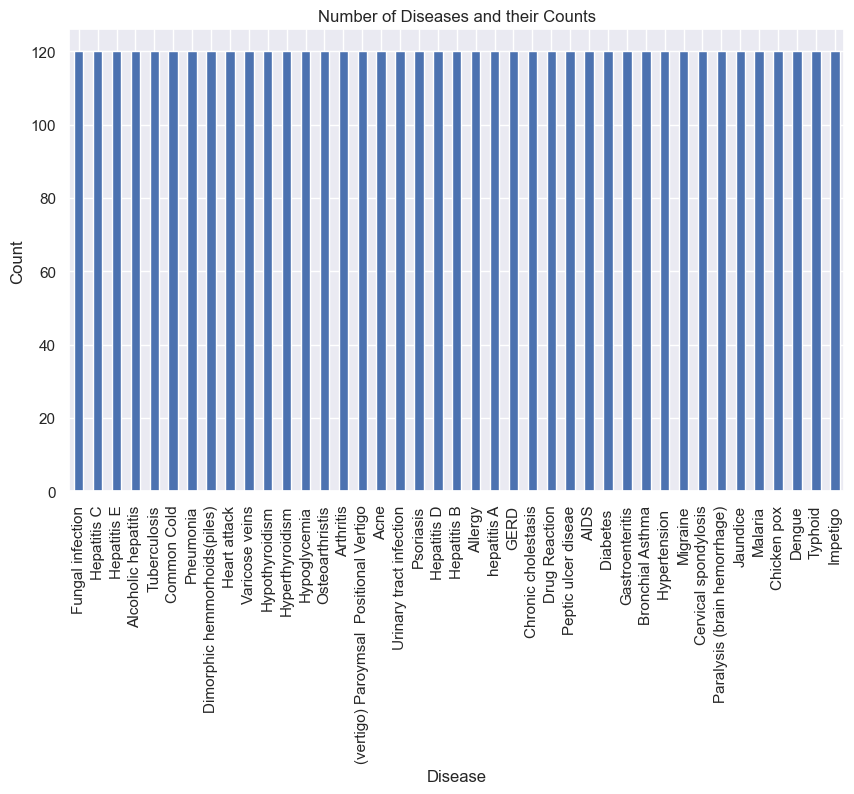

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("datasets/Training.csv")

# Count the occurrences of each disease
disease_counts = data['prognosis'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar')
plt.title('Number of Diseases and their Counts')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


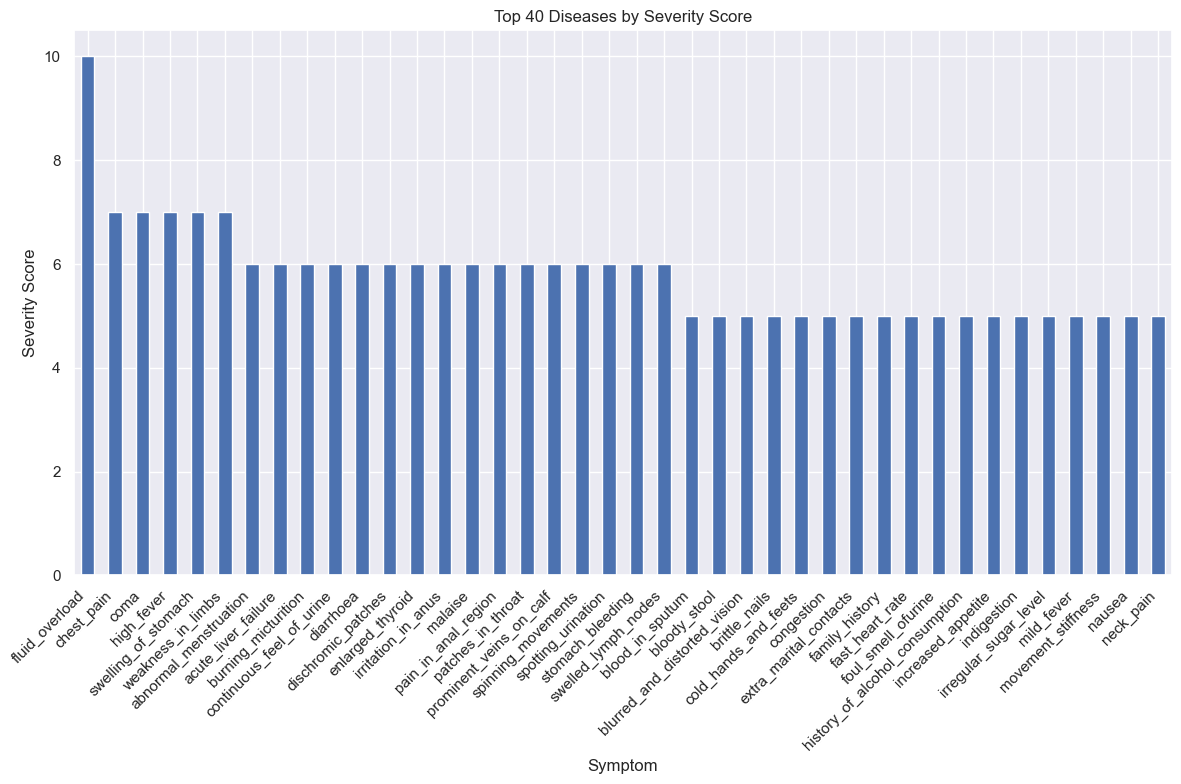

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Datasets/Symptom-severity.csv")

# Aggregate the severity scores for each disease
disease_severity = data.groupby('Symptom')['weight'].sum()

# Select top N diseases by severity score
top_n = 40  # Specify the number of top diseases you want to display
top_diseases = disease_severity.nlargest(top_n)

# Plot a bar graph with top N diseases
plt.figure(figsize=(12, 8))
top_diseases.plot(kind='bar')
plt.title(f'Top {top_n} Diseases by Severity Score')
plt.xlabel('Symptom')
plt.ylabel('Severity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


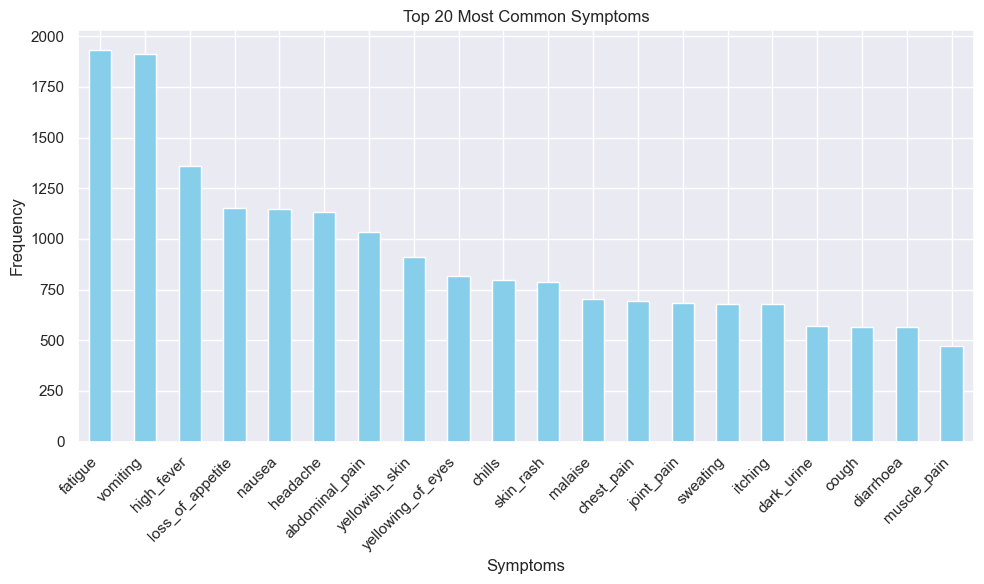

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("datasets/Training.csv")

# Extract the column containing symptoms
symptoms = data.drop(['prognosis'], axis=1).columns

# Count the frequency of each symptom
symptom_counts = data[symptoms].sum().sort_values(ascending=False)

# Select the top 10 most common symptoms
top_symptoms = symptom_counts.head(20)

# Plot the graph
plt.figure(figsize=(10, 6))
top_symptoms.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


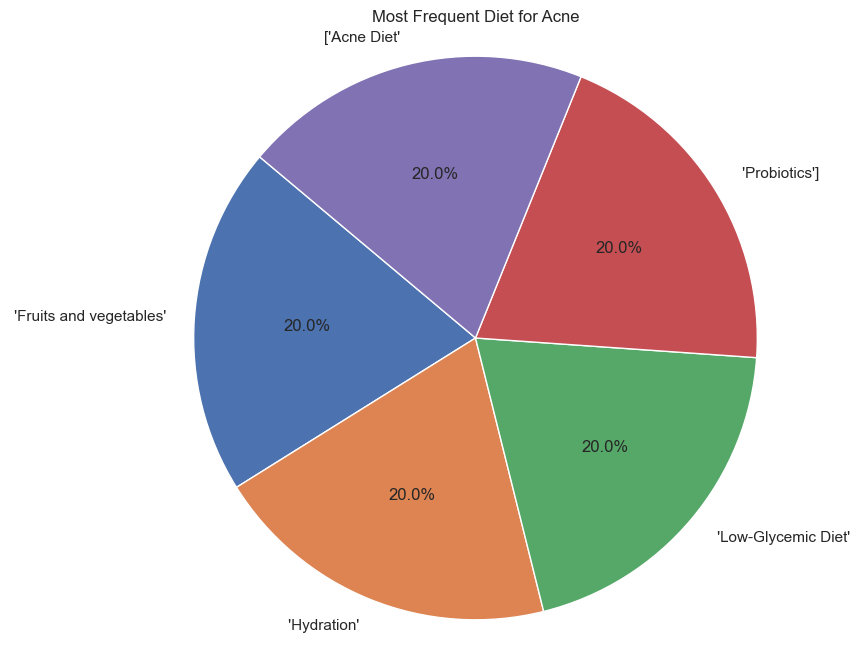

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
diets_data = pd.read_csv("datasets/diets.csv")

# Split the diet list
diets_data['Diet'] = diets_data['Diet'].str.split(',')

# Create a new DataFrame with each diet on a separate row
diets_expanded = diets_data.explode('Diet')

# Count the frequency of each diet for each disease
diet_frequencies = diets_expanded.groupby(['Disease', 'Diet']).size().reset_index(name='Frequency')

# Select the most frequent diet for a specific disease
selected_disease = 'Acne'  # Replace 'YourDiseaseHere' with the desired disease
selected_diet = diet_frequencies[diet_frequencies['Disease'] == selected_disease].sort_values(by='Frequency', ascending=False).iloc[0]['Diet']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(diet_frequencies[diet_frequencies['Disease'] == selected_disease]['Frequency'], labels=diet_frequencies[diet_frequencies['Disease'] == selected_disease]['Diet'], autopct='%1.1f%%', startangle=140)
plt.title(f'Most Frequent Diet for {selected_disease}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


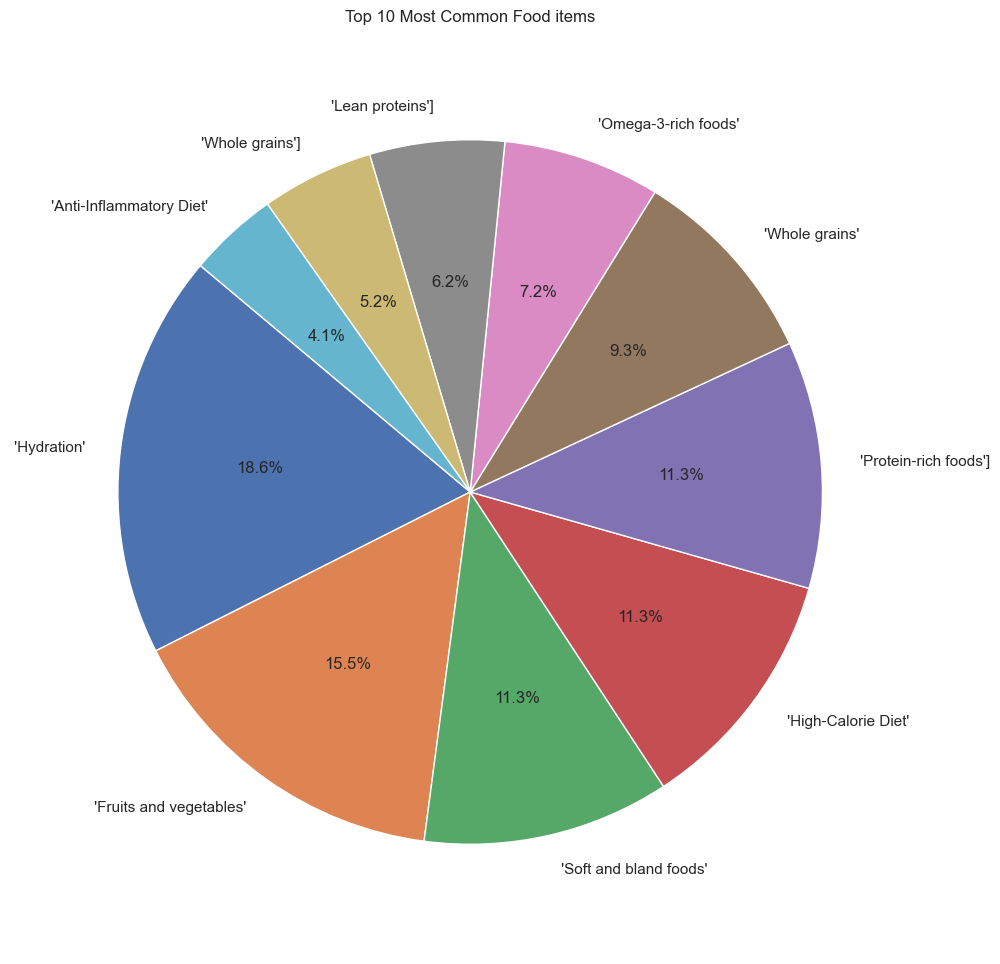

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
diets_data = pd.read_csv("datasets/diets.csv")

# Split the diet list
diets_data['Diet'] = diets_data['Diet'].str.split(',')

# Create a new DataFrame with each food item on separate row
diets_expanded = diets_data.explode('Diet')

# Count the frequency of each food item
diet_frequencies = diets_expanded['Diet'].value_counts()

# Select the top 10 most common food items
top_10_diets = diet_frequencies.head(10)

# Plotting the pie chart for the top 10 most common food items
plt.figure(figsize=(10, 12))
plt.pie(top_10_diets, labels=top_10_diets.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Food items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


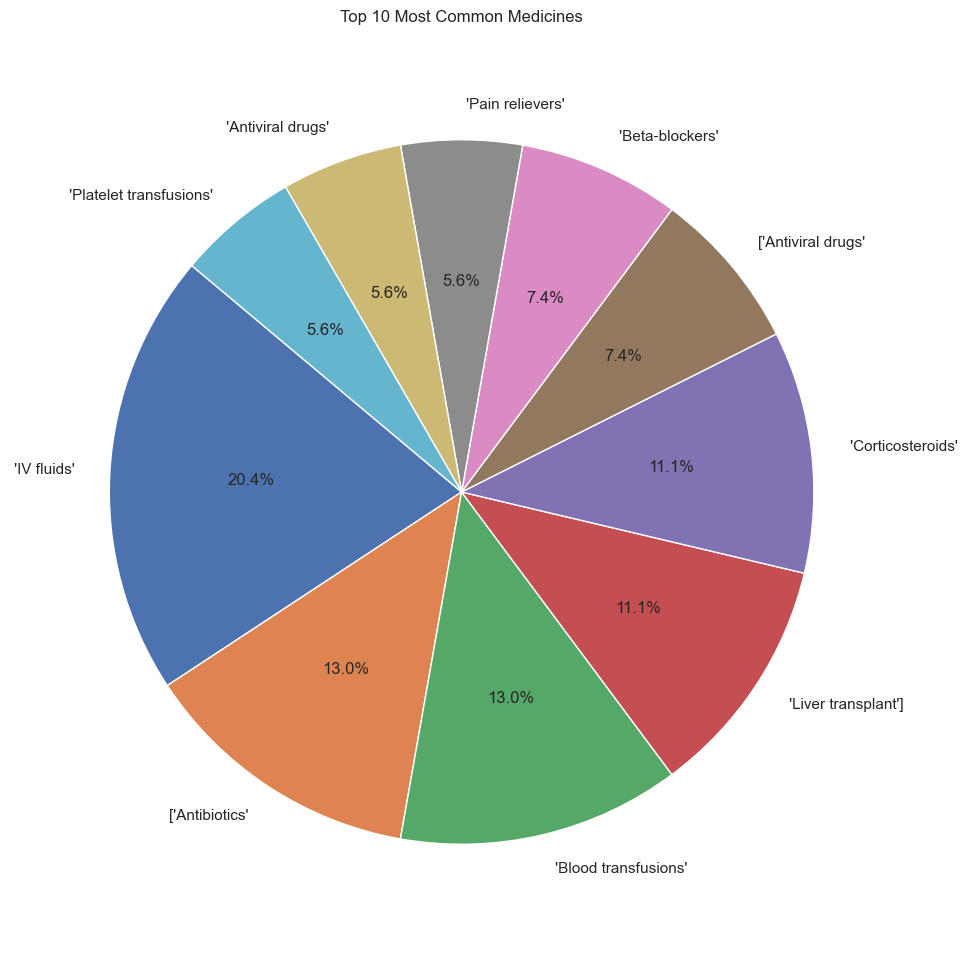

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
diets_data = pd.read_csv("datasets/medications.csv")

# Split the diet list
diets_data['Medication'] = diets_data['Medication'].str.split(',')

# Create a new DataFrame with each food item on separate row
diets_expanded = diets_data.explode('Medication')

# Count the frequency of each food item
diet_frequencies = diets_expanded['Medication'].value_counts()

# Select the top 10 most common food items
top_10_diets = diet_frequencies.head(10)

# Plotting the pie chart for the top 10 most common food items
plt.figure(figsize=(10, 12))
plt.pie(top_10_diets, labels=top_10_diets.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Medicines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

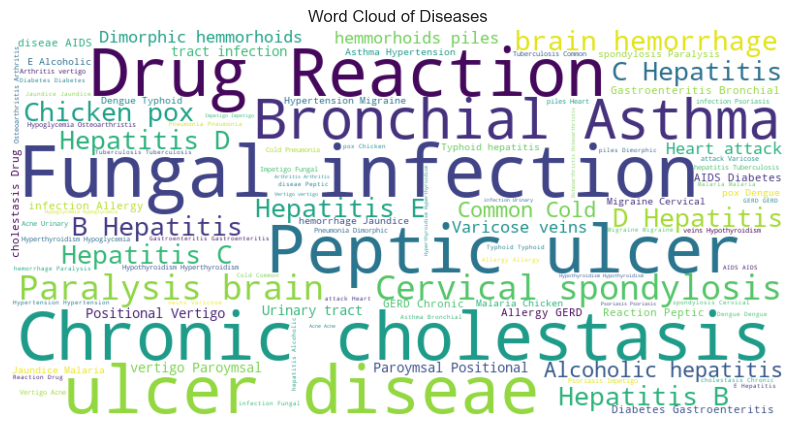

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
training_data = pd.read_csv("datasets/Training.csv")

# Combine all disease names into a single string
all_diseases_text = ' '.join(training_data['prognosis'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_diseases_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Diseases')
plt.axis('off')
plt.show()


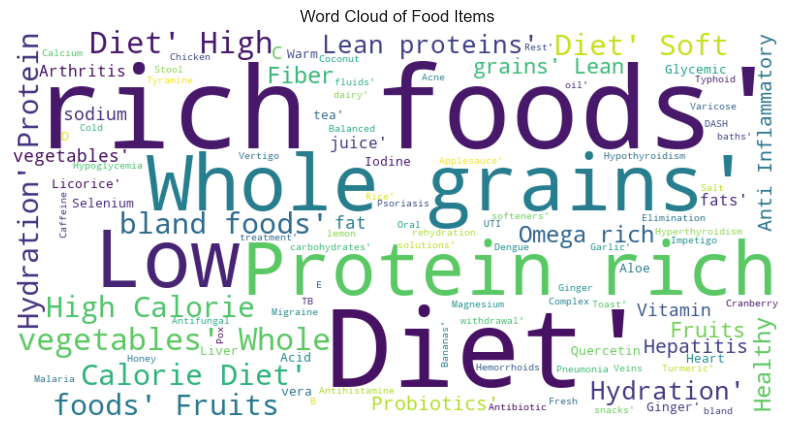

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
diet_data = pd.read_csv("datasets/diets.csv")

# Combine all food items into a single string
all_food_items_text = ' '.join(diet_data['Diet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_food_items_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Food Items')
plt.axis('off')
plt.show()


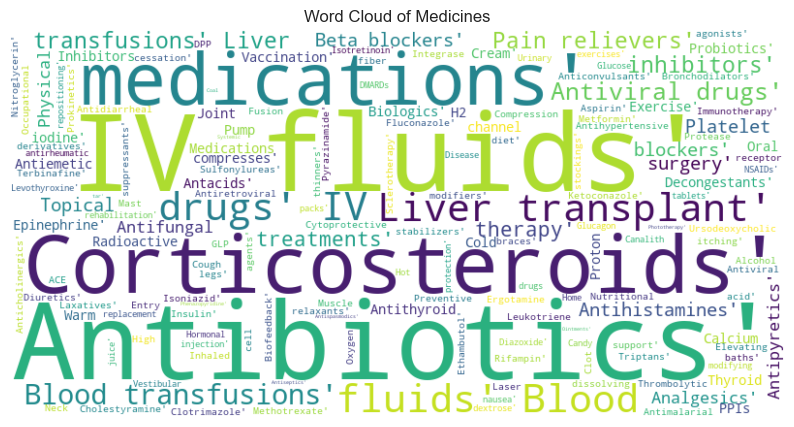

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
medications_data = pd.read_csv("datasets/medications.csv")

# Combine all medicine names into a single string
all_medicines_text = ' '.join(medications_data['Medication'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_medicines_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Medicines')
plt.axis('off')
plt.show()
